# 1. Import labrary

In [ ]:
    # 📂 OS module: Helps with file and folder operations (e.g., accessing image paths)
import os  
    # 🔢 NumPy: Used for numerical computations and handling image data as arrays
import numpy as np  
    # 🖼️ Image processing: Used to load and preprocess images
from tensorflow.keras.preprocessing import image  
    # 📊 Splitting dataset: Divides data into training and testing sets
from sklearn.model_selection import train_test_split  
    # ⚖️ Normalization: Standardizes data for better distance calculations in KNN
from sklearn.preprocessing import StandardScaler  
    # ✅ Model Evaluation: Measures how well the model predicts (accuracy calculation)
from sklearn.metrics import accuracy_score  
    # 🤖 KNN Classifier: Implements the K-Nearest Neighbors algorithm for classification
from sklearn.neighbors import KNeighborsClassifier    
    # 📈 Visualization: Used to display images and classification results
import matplotlib.pyplot as plt  

# 2. Load Image Paths and Labels

**load_images() Function:**

- Initializes empty lists to store image file paths and labels.
  
- Iterates over the cat/ and dog/ folders, assigning 0 for cats and 1 for dogs.

- Checks if a file is an image (.jpg, .png, .jpeg) before adding it.

- Returns two arrays:

  ***image_paths:*** List of full paths to the images.

  ***labels:*** Corresponding labels (0 for cats, 1 for dogs).

The function returns the file paths and labels, preparing the data for training the KNN model. 

In [8]:
# Dataset Path
dataset_path = '/kaggle/input/knnclasstering/dog-vs-cat'

# Load Images and Labels
def load_images(dataset_path):
    image_paths = []
    labels = []

    for label, category in enumerate(["cat", "dog"]):  # 0 = Cats, 1 = Dogs
        category_path = os.path.join(dataset_path, category)
        for file in os.listdir(category_path):
            if file.endswith((".jpg", ".png", ".jpeg")):
                image_paths.append(os.path.join(category_path, file))
                labels.append(label)
    
    return image_paths, np.array(labels)

image_paths, labels = load_images(dataset_path)


# 3. Extract Features from Images

This function extracts features from images by converting them into numerical arrays for training the KNN model.

**1.** Loads each image, resizes it to (100, 100), and converts it into an array.

**2.** Normalizes pixel values (dividing by 255.0) to scale them between 0 and 1.

**3.** Flattens the image into a 1D array to make it suitable for KNN.

   - Each image becomes a list of numbers representing colors.


**4.** Returns a NumPy array of features (X) and their corresponding labels (y).



In [9]:
def extract_features(image_paths, target_size=(100, 100)):
    features = []
    
    for img_path in image_paths:
        try:
            img = image.load_img(img_path, target_size=target_size)
            img_array = image.img_to_array(img) / 255.0  # Normalize pixel values
            features.append(img_array.flatten())  # Convert to 1D array
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    
    return np.array(features)

# Extract features
X = extract_features(image_paths)
y = labels


# 3. Normalize and Split Data

- Normalization: We scale pixel values so they are comparable (between 0 and 1).
- Splitting: We divide the dataset into:
  
   **Training set (80%) → To teach the model.**
  
   **Testing set (20%) → To check how well the model learned.**

KNN works by comparing distances. If features are not normalized, the model may be biased.

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalize features

# Split into Training (80%) and Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# 4.Train the KNN Model

- We choose a K value (number of neighbors, e.g., k=11).
- The model learns by memorizing all training data.

KNN doesn’t train like neural networks. Instead, it remembers data and compares new images to find the closest neighbors.

In [49]:
# Train KNN Model
knn = KNeighborsClassifier(n_neighbors=11) 
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=11)

# 5.Evaluate Model Performance

- The model predicts if test images are cats or dogs.

- We compare its predictions to the actual labels.

- We calculate accuracy to see how well the model performs.

To check if our model correctly classifies images.

In [44]:

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")


Test Accuracy: 0.58


# 6. Classify a New Image

- A new image is resized and converted to numbers.
- The model checks which training images are closest.
- It assigns the most common neighbor label (cat or dog).

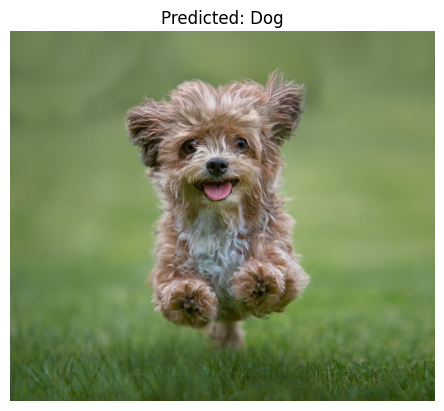

In [56]:
def classify_new_image(image_path):
    # Load and preprocess image for prediction
    img = image.load_img(image_path, target_size=(100, 100))  # Resize only for model input
    img_array = image.img_to_array(img) / 255.0
    img_feature = img_array.flatten().reshape(1, -1)

    # Normalize features
    img_feature_scaled = scaler.transform(img_feature)

    # Predict
    prediction = knn.predict(img_feature_scaled)
    class_name = "Dog" if prediction[0] == 1 else "Cat"

    # Load image again for better display (original size)
    img_display = image.load_img(image_path)  

    # Display result
    plt.imshow(img_display)
    plt.axis("off")
    plt.title(f"Predicted: {class_name}")
    plt.show()

# Example
classify_new_image("/kaggle/input/testdocat/test.jpg")


# 7. Save the model .pkl

In [ ]:
import joblib
joblib.dump(knn, '/kaggle/working/KnnModel.pkl')  # Save model


['/kaggle/working/KnnModel.pkl']